In [1]:
import pandas as pd
import numpy as np

# 空值处理

In [2]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [3]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
46 ms ± 805 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.85 ms ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [4]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [5]:
data = pd.Series([1, np.nan, 'hello', None])

In [6]:
data.isna()

0    False
1     True
2    False
3     True
dtype: bool

In [7]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [8]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [9]:
data.dropna()

0        1
2    hello
dtype: object

In [10]:
df = pd.DataFrame([[1, np.nan, 2],[2, 3, 5],[np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [11]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [12]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [13]:
df.dropna(axis=1,how='any')

,2
0,2
1,5
2,6


In [14]:
df.dropna(axis=1,how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [15]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [16]:
data.fillna(method="ffill")#从前往后填充（forward-fill）

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [17]:
data.fillna(method="bfill")#从后往前填充（back-fill）：

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [18]:
df.fillna?

# 层级索引

In [19]:
#笨办法
index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [20]:
pop[('California', 2000):('New York',2010)]

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
dtype: int64

In [21]:
index=pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [22]:
pop=pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [23]:
type(pop)

pandas.core.series.Series

In [24]:
pop[:,2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [25]:
pop_df=pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [26]:
type(pop_df)

pandas.core.frame.DataFrame

In [27]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [28]:
pop_df = pd.DataFrame({'total': pop,
'under18': [9267089, 9284094,
4687374, 4318033,
5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [29]:
pop_df['test']=2

In [30]:
pop_df

total  under18  test
California 2000  33871648  9267089     2
           2010  37253956  9284094     2
New York   2000  18976457  4687374     2
           2010  19378102  4318033     2
Texas      2000  20851820  5906301     2
           2010  25145561  6879014     2

In [31]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [32]:
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])
df

data1     data2
a 1  0.727970  0.409961
  2  0.485845  0.339479
b 1  0.577514  0.997697
  2  0.381789  0.819852

In [33]:
df.unstack()

data1               data2          
          1         2         1         2
a  0.727970  0.485845  0.409961  0.339479
b  0.577514  0.381789  0.997697  0.819852

In [34]:
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [35]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [36]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [37]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [38]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [39]:
pop.index.names=["state","year"]

In [40]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [41]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])

In [42]:
data = np.round(np.random.randn(4, 6), 1)
data

array([[-0.1,  0.8,  0.2, -0.7, -3.1, -0.9],
       [-3.4, -0.6,  0.4,  1.2, -0.5, -1.2],
       [-1.3, -0. , -0.4,  0.6, -0.3,  0.7],
       [ 2.1, -1.8, -0.6,  0.5, -0.4,  1.6]])

In [43]:
data[:, ::2] *= 10

In [44]:
data += 37

In [45]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      36.0  37.8  39.0  36.3   6.0  36.1
     2       3.0  36.4  41.0  38.2  32.0  35.8
2014 1      24.0  37.0  33.0  37.6  34.0  37.7
     2      58.0  35.2  31.0  37.5  33.0  38.6

In [46]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      39.0  36.3
     2      41.0  38.2
2014 1      33.0  37.6
     2      31.0  37.5

In [47]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [48]:
 pop['California', 2010]

37253956

In [49]:
 pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [50]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [51]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [52]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [53]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      36.0  37.8  39.0  36.3   6.0  36.1
     2       3.0  36.4  41.0  38.2  32.0  35.8
2014 1      24.0  37.0  33.0  37.6  34.0  37.7
     2      58.0  35.2  31.0  37.5  33.0  38.6

In [54]:
health_data['Guido', 'HR']

year  visit
2013  1        39.0
      2        41.0
2014  1        33.0
      2        31.0
Name: (Guido, HR), dtype: float64

In [55]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      36.0  37.8
     2       3.0  36.4

In [56]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        36.0
      2         3.0
2014  1        24.0
      2        58.0
Name: (Bob, HR), dtype: float64

In [57]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,36.0,39.0,6.0
2014,1,24.0,33.0,34.0


In [58]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.052716
      2      0.937643
c     1      0.792800
      2      0.322972
b     1      0.969058
      2      0.992082
dtype: float64

In [59]:
data = data.sort_index()
data

char  int
a     1      0.052716
      2      0.937643
b     1      0.969058
      2      0.992082
c     1      0.792800
      2      0.322972
dtype: float64

In [60]:
 data['a':'b']

char  int
a     1      0.052716
      2      0.937643
b     1      0.969058
      2      0.992082
dtype: float64

In [61]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [62]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [63]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [64]:
pop.unstack()

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [65]:
#注意联系reindex()
#pd.Series.reset_index?
#Series 转 dataframe
pop_flat=pop.reset_index(name='poppulation')
pop_flat

,state,year,poppulation
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [66]:
ser=pop_flat.set_index(['state',"year"])
ser

poppulation
state      year             
California 2000     33871648
           2010     37253956
New York   2000     18976457
           2010     19378102
Texas      2000     20851820
           2010     25145561

In [67]:
ser["poppulation"]

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
Name: poppulation, dtype: int64

type(ser),type(ser["poppulation"])

In [68]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      36.0  37.8  39.0  36.3   6.0  36.1
     2       3.0  36.4  41.0  38.2  32.0  35.8
2014 1      24.0  37.0  33.0  37.6  34.0  37.7
     2      58.0  35.2  31.0  37.5  33.0  38.6

In [69]:
data_mean=health_data.mean(level='year')
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     19.5  37.1  40.0  37.25  19.0  35.95
2014     41.0  36.1  32.0  37.55  33.5  38.15

In [70]:
data_mean.mean(level='subject',axis=1)

subject,Bob,Guido,Sue
year,,,
2013,28.30,38.625,27.475
2014,38.55,34.775,35.825


In [71]:
def make_df(cols, ind):
    """一个简单的DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)
# DataFrame示例
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [74]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
x = [[1, 2],
[3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [76]:
pd.concat?

In [77]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [78]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [79]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis=1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [80]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # 复制索引
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [81]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [82]:
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [83]:
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [84]:
x = make_df('AB', [0, 1])
y = make_df('cd', [2, 3])
y.index = x.index # 复制索引
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    c   d
0  c2  d2
1  c3  d3
     A    B    c    d
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
0  NaN  NaN   c2   d2
1  NaN  NaN   c3   d3


e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [86]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6])) # join='outer'

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
print(df5); print(df6);
print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [88]:
print(df5); print(df6);
print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [89]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [90]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [92]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [93]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [95]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],
'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [96]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [97]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [99]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name',axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [103]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [104]:
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [106]:
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [107]:
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


In [108]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
'drink': ['wine', 'beer']},
columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [109]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [110]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [111]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [112]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


In [114]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [115]:
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [116]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [117]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [118]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [119]:
ser.sum()

2.811925491708157

In [120]:
ser.mean()

0.5623850983416314

In [123]:
df = pd.DataFrame({'A': rng.rand(5),'B': rng.rand(5)})
df

,A,B
0,0.785176,0.607545
1,0.199674,0.170524
2,0.514234,0.065052
3,0.592415,0.948886
4,0.046450,0.965632


In [124]:
df.mean()

A    0.427590
B    0.551528
dtype: float64

In [125]:
df.mean(axis=1)

0    0.696360
1    0.185099
2    0.289643
3    0.770650
4    0.506041
dtype: float64

In [126]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [127]:
 df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [129]:
df.groupby(by='key').sum()

,data
key,
A,3
B,5
C,7


In [130]:
df.groupby(by='key').max()

,data
key,
A,3
B,4
C,5


In [134]:
planets.groupby('method')['orbital_period'].m()

method
Astrometry                        246.360000
Eclipse Timing Variations        1916.250000
Imaging                          4639.150000
Microlensing                     1825.000000
Orbital Brightness Modulation       0.240104
Pulsar Timing                       0.090706
Pulsation Timing Variations      1170.000000
Radial Velocity                     0.736540
Transit                             0.355000
Transit Timing Variations          22.339500
Name: orbital_period, dtype: float64

In [135]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [139]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [143]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [144]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [145]:
df.groupby('key').aggregate({'data1': 'min','data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [146]:
def filter_func(x):
    return x['data2'].std() > 4
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [147]:
 df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [149]:
def norm_by_data2(x):
# x是一个分组数据的DataFrame
    x['data1'] /= x['data2'].sum()
    return x
print(df); print(df.groupby('key').apply(norm_by_data2))  #,axis=1

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [150]:
pd.DataFrame.apply?

# 数据透视表

In [151]:
titanic = sns.load_dataset('titanic')

In [152]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [154]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [156]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [157]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [158]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# 向量化字符串操作

In [159]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [160]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [161]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [162]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [163]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [164]:
monte.str.get_dummies()

,Eric Idle,Graham Chapman,John Cleese,Michael Palin,Terry Gilliam,Terry Jones
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
5,0,0,0,1,0,0


In [165]:
 monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [166]:
full_monte = pd.DataFrame({'name': monte,
'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
'B|C|D']})

In [167]:
 full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# 处理时间序列

In [168]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [169]:
date.strftime('%A')

'Saturday'

In [170]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [171]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
'2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [172]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [173]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [177]:
import datetime
dates = pd.to_datetime([datetime.datetime(2015, 7, 3), '4th of July, 2015',
'2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [178]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [179]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [180]:
dates[0]

Timestamp('2015-07-03 00:00:00')

In [181]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [182]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [183]:
 pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [184]:
pd.period_range('2015-07-03', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [185]:
 pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

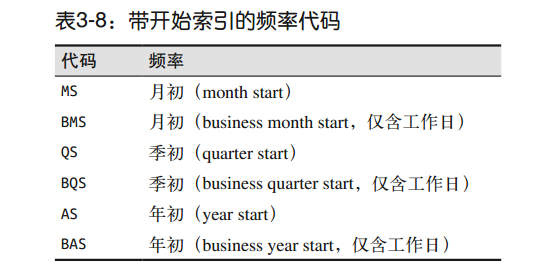
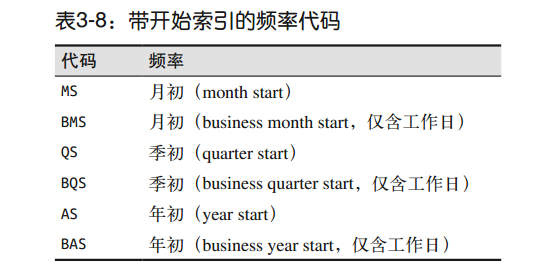

In [186]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [187]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

# 高性能Pandas： eval()与query()

In [188]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
for i in range(4))

In [189]:
%timeit df1 + df2 + df3 + df4

68.5 ms ± 782 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [191]:
%timeit pd.eval('df1 + df2 + df3 + df4')

31.7 ms ± 990 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [192]:
np.allclose(df1 + df2 + df3 + df4,pd.eval('df1 + df2 + df3 + df4'))

True

In [198]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
for i in range(5))

In [199]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [200]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [201]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [202]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [203]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

In [204]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [205]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [207]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

In [210]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [211]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


In [212]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

In [213]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [214]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [217]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True